In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Importing the dataset
dataset = pd.read_excel('Social_Network_Ads.xlsx')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [3]:
dataset.shape

(400, 5)

In [4]:
#merubah data teks pada gender menjadi numerik
l_gender = LabelEncoder()
dataset['Gender'] = l_gender.fit_transform(dataset['Gender'])
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510       1  19.0          19000.0          0
1  15810944       1  35.0          20000.0          0
2  15668575       0  26.0          43000.0          0
3  15603246       0  27.0          57000.0          0
4  15804002       1  19.0          76000.0          0

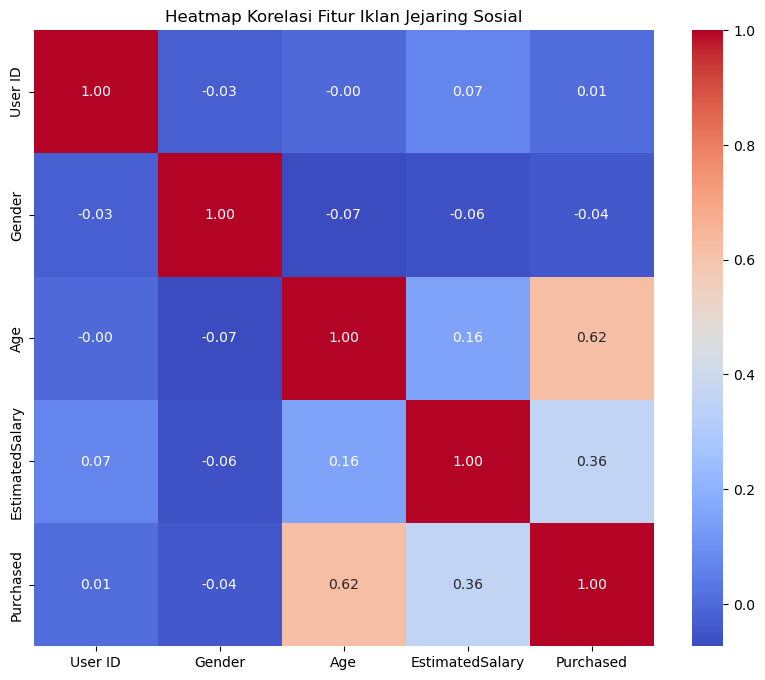

In [5]:
#menentukan korelasi antara variable numerik

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Iklan Jejaring Sosial")
plt.show()


In [6]:
#menentukan fitur yang dipakai
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [7]:
dataset.shape

(400, 5)

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(280, 2)
(280,)
(120, 2)
(120,)


In [9]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
classifier = svm.SVC(kernel="rbf")  #kernel untuk memetakan dataset menjadi dimensi lebih tinggi

# Melatih model SVM
classifier.fit(X_train, y_train)

SVC()

In [11]:
# Melakukan prediksi data train
y_train_pred = classifier.predict(X_train)

In [12]:
# Melakukan prediksi data tes
y_pred_test = classifier.predict(X_test)

In [13]:
# Membuat confusion matriks
cm = confusion_matrix(y_test, y_pred_test)

In [14]:
print("Akurasi pada data train:")
print(classification_report(y_train, y_train_pred))

Akurasi pada data train:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       184
           1       0.83      0.90      0.86        96

    accuracy                           0.90       280
   macro avg       0.89      0.90      0.89       280
weighted avg       0.90      0.90      0.90       280



In [15]:
print("Akurasi pada data tes:")
print(classification_report(y_test, y_pred_test))

Akurasi pada data tes:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.90      0.96      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



C:\Users\Hani\AppData\Local\Temp\ipykernel_6980\2957461739.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


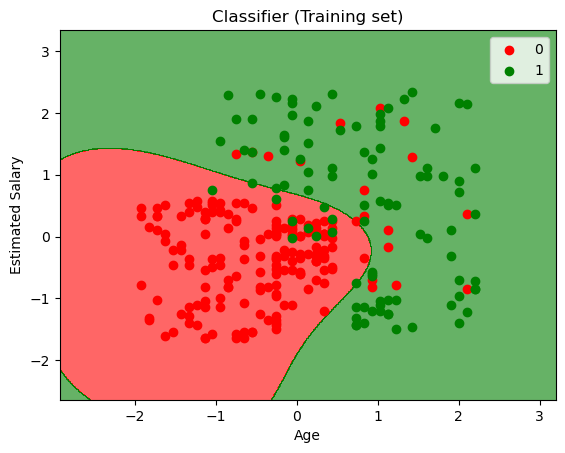

In [16]:
# Visualisasi hasil training
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Hani\AppData\Local\Temp\ipykernel_6980\176344666.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


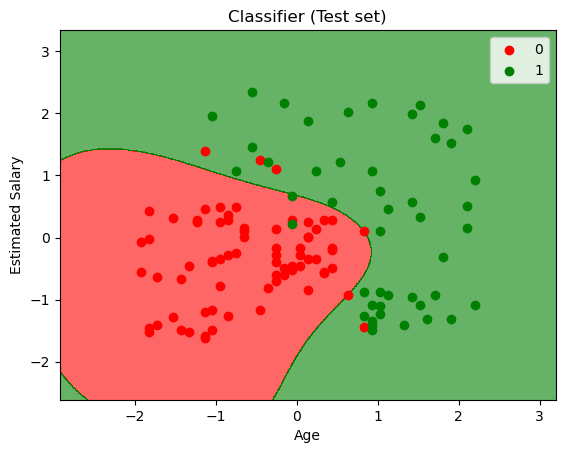

In [17]:
# Visualisasi hasil test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()